In [1]:
# paket import

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataframe'i oluştur

df = pd.read_csv('1.Seans.csv', index_col=0)

In [3]:
# temel istatistikler

df.describe()

,demand,marketPrice,oldMarketPrace,Player1,Player2,Player3,Player4,Player5,Player6,Player7,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
count,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,...,2675.000000,2675.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.0,3977.000000,3977.000000,3977.000000
mean,97944.161428,108.382198,114.139552,0.014081,0.027408,0.045763,0.019361,0.000754,0.012069,0.026905,...,2.457570,7.833271,1.596176,8.705675,71.890536,4.031149,0.0,4.346612,8.372928,0.673257
std,62127.362520,83.283085,82.686269,0.117840,0.163288,0.208997,0.137809,0.027458,0.109210,0.161825,...,1.015573,1.177519,0.544338,3.600398,36.251900,0.667340,0.0,1.795980,2.653632,0.112071
min,26640.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,6.000000,1.000000,4.000000,9.000000,3.000000,0.0,2.000000,2.000000,0.500000
25%,44795.000000,16.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,7.000000,1.000000,4.100000,32.020000,3.220000,0.0,2.047900,7.120900,0.536800
50%,83025.000000,139.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,7.000000,1.630000,10.160000,99.990000,4.440000,0.0,5.071500,9.999900,0.742000
75%,131694.000000,200.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,9.000000,1.930000,11.480000,99.990000,4.490000,0.0,5.730900,9.999900,0.749800
max,246444.000000,200.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,10.000000,3.120000,15.320000,99.990000,5.220000,0.0,7.646000,9.999900,0.872400


In [4]:
# marketPrice üzerinde etkisi olmayanlar dataframe den silinmiştir. ,"cc_Gas"
playerCorr=df.drop(["quant","pltNum","cc_Urn","Geothermal", "capacity", "investmentCost", "to_build_period", "capacityFactor",
"efficiency","Coal","Solar","CO_Emission","Wind","operation_period"] ,axis=1) 
Corr1 = playerCorr.corr()["player_bid_price"].sort_values()
#mPCorr1.to_excel("mPCorr/4.seans_MP_kolerasyon.xlsx")
Corr1

Player25           -0.123364
Player19           -0.102405
Player8            -0.091218
Player11           -0.088166
Player39           -0.087144
Player17           -0.079913
Player26           -0.074962
Player2            -0.070715
Player9            -0.070618
Player13           -0.065920
Player34           -0.061023
Player20           -0.053401
Player3            -0.050175
Player37           -0.042960
Player4            -0.027163
cc_Gas             -0.026408
Player10           -0.024122
Player5            -0.020060
Player6            -0.013027
Player30           -0.010733
Player35           -0.006761
Player7            -0.005974
Hydro               0.004087
Player21            0.007490
Player1             0.016682
Player29            0.022354
Player38            0.024357
Player14            0.028706
Player24            0.031938
Player15            0.036216
Player32            0.036859
Player12            0.046229
Player22            0.046910
Bioenergy           0.051728
Player16      

In [5]:
# inputlar  Bioenergy capacityFactor CCGT cc_Gas to_build_period capacity investmentCost Nuclear fc_Gas cc_Bio fc_Bio
#fc_Coal cc_Coal  fc_Urn demand marketPrice 17-oldMarketPrace '=> ,'capacity' ,'investmentCost', 'to_build_period','capacityFactor'

x = df[['demand','marketPrice','oldMarketPrace','Bioenergy','CCGT','Nuclear','fc_Urn','fc_Coal','fc_Gas','fc_Bio','cc_Coal', 
'cc_Bio', 'Hydro', 'Player21', 'Player1', 'Player29', 'Player38', 'Player14', 'Player24', 'Player15','Player32',
'Player12','Player22','Player16','Player31','Player28','Player18','Player33','Player23','Player36','Player27']]
x

,demand,marketPrice,oldMarketPrace,Bioenergy,CCGT,Nuclear,fc_Urn,fc_Coal,fc_Gas,fc_Bio,...,Player12,Player22,Player16,Player31,Player28,Player18,Player33,Player23,Player36,Player27
period,,,,,,,,,,,,,,,,,,,,,
1,26640,155,0,0,1,0,1.00,4.00,9.00,3.00,...,0,0,1,0,0,0,0,0,0,0
1,26640,155,0,0,1,0,1.00,4.00,9.00,3.00,...,0,0,0,0,0,1,0,0,0,0
1,26640,155,0,0,1,0,1.00,4.00,9.00,3.00,...,0,0,0,0,0,1,0,0,0,0
1,26640,155,0,0,1,0,1.00,4.00,9.00,3.00,...,0,0,0,0,0,1,0,0,0,0
1,26640,155,0,0,1,0,1.00,4.00,9.00,3.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,246444,200,200,0,0,0,3.12,15.32,99.99,5.22,...,0,0,0,0,0,0,0,0,0,0
32,246444,200,200,0,0,0,3.12,15.32,99.99,5.22,...,0,0,0,0,0,0,0,0,0,0
32,246444,200,200,0,0,0,3.12,15.32,99.99,5.22,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# output astype( 'float' )

y = df['player_bid_price']
y

period
1     120
1     132
1     121
1     143
1      90
     ... 
32     70
32     50
32     90
32    150
32    200
Name: player_bid_price, Length: 3977, dtype: int64

In [7]:
# önce input'un ve output'un boyutuna bakalım

print("X'in boyutu:", x.shape)
print("y'in boyutu:", y.shape)

X'in boyutu: (3977, 31)
y'in boyutu: (3977,)


In [8]:
# y'yi yeniden boyutlandırmamız lazım
# (200, 1) şeklinde

y = y.values.reshape(-1, 1)

In [9]:
# y'in yeni boyutu

print("y'in boyutu:", y.shape)

y'in boyutu: (3977, 1)


In [10]:
# scikit-learn'den import

from sklearn.model_selection import train_test_split

# train data
# X_train, y_train

# test_data
# X_test, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [11]:
# şekiller

print("X_train'in boyutu:", x_train.shape)
print("y_train'in boyutu:", y_train.shape)

print("X_test'in boyutu:", x_test.shape)
print("y_test'in boyutu:", y_test.shape)

X_train'in boyutu: (2783, 31)
y_train'in boyutu: (2783, 1)
X_test'in boyutu: (1194, 31)
y_test'in boyutu: (1194, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.svm import SVR

SVM = SVR(kernel='rbf', gamma=0.60, C=1000)
SVM.fit(x_train,y_train)
y_tahmin = SVM.predict(x_test)

C:\Users\omerp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDf

,Gerçek Y
0,22
1,1
2,150
3,52
4,50
...,...
1189,165
1190,150
1191,200
1192,1


In [15]:
testTahminleri = pd.Series(y_tahmin.reshape(1194,))
testTahminleri

0         1.101495
1         4.099745
2       174.608820
3         4.099745
4         2.095652
           ...    
1189    199.305677
1190    100.098988
1191    199.899854
1192      0.099385
1193    109.960248
Length: 1194, dtype: float64

In [16]:
tahminDf= pd.concat([tahminDf,testTahminleri],axis=1)
tahminDf.columns = ["Gerçek Y - SVM", "Tahmin Y - SVM"]
tahminDf.to_excel("4.seans_gerçek_tahmin.xlsx")
tahminDf

,Gerçek Y - SVM,Tahmin Y - SVM
0,22,1.101495
1,1,4.099745
2,150,174.608820
3,52,4.099745
4,50,2.095652
...,...,...
1189,165,199.305677
1190,150,100.098988
1191,200,199.899854
1192,1,0.099385


In [17]:
# Metric Libraris

from sklearn.metrics import mean_absolute_error         # MAE 
from sklearn.metrics import mean_squared_error          # MSE 
                                                        # RMSE
from sklearn.metrics import mean_squared_log_error      # RMSLE
from sklearn.metrics import r2_score                    # R²  
from sklearn.metrics import mean_poisson_deviance       # MAPE
from sklearn import metrics

In [18]:
print('Mean Squared Error_dtReg1:', metrics.mean_squared_error(y_test, y_tahmin)) 
print('Root Mean Squared Error_dtReg1:', np.sqrt(metrics.mean_squared_error(y_test, y_tahmin)))
print('RSquared_dtReg1:', r2_score(y_test, y_tahmin))
print('Mean Absolute Error_dtReg1:', metrics.mean_absolute_error(y_test, y_tahmin))

Mean Squared Error_dtReg1: 2246.2078550018086
Root Mean Squared Error_dtReg1: 47.39417532779538
RSquared_dtReg1: 0.4919913386953083
Mean Absolute Error_dtReg1: 27.79555317591923


C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


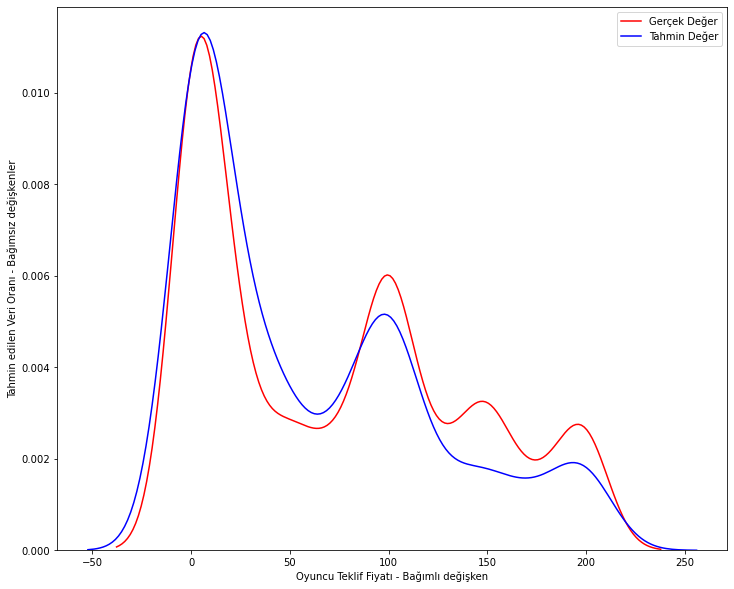

In [19]:
y_tahmin = SVM.predict(x_test)

width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['player_bid_price'], hist=False, color="r", label="Gerçek Değer")
sns.distplot(y_tahmin, hist=False, color="b", label="Tahmin Değer" , ax=ax1).get_figure().savefig("SVM",dpi =50)


#plt.title('SVM - Actual vs Fitted Values for player_bid_price')
plt.xlabel('Oyuncu Teklif Fiyatı - Bağımlı değişken')
plt.ylabel('Tahmin edilen Veri Oranı - Bağımsız değişkenler')
plt.legend(loc='upper right')
plt.show()
plt.close()